In [27]:
import moviepy.editor as mp

miVideo = mp.VideoFileClip("brr.mp4")

In [28]:
miVideo

In [29]:
miVideo.audio.write_audiofile("resultado.wav")

chunk:   5%|▌         | 35/665 [00:00<00:01, 347.46it/s, now=None]MoviePy - Writing audio in resultado.wav
                                                                   MoviePy - Done.


In [30]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
import time

# create a speech recognition object
r = sr.Recognizer()
with sr.WavFile("resultado.wav") as source:              # use "test.wav" as the audio source
    audio = r.record(source)  
try:
    texto = r.recognize_google(audio, language='es-ES')  # recognize speech using Google Speech Recognition
    time.sleep(1.5)
    print("Transcripcion " + texto)

except LookupError:                                 # speech is unintelligible
    print("Could not understand audio")

Transcripcion hola buenas a todos soy Manuel Salvador estudiante la Universidad Europea de Madrid estoy con Daniel Dani salvaje en un Ikea en un proyecto que en el que vamos a intentar pasar este vídeo sacar el audio del mismo y poder pasarla textos y mira lo que hace Google Google Google Maps en con sus con sus propios aplicaciones y vamos a intentar que funcione esto es una pequeña prueba de unos 30 segundos a ver qué tal


In [10]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
import nltk
from nltk import sent_tokenize

# create a speech recognition object
r = sr.Recognizer()
sound = AudioSegment.from_wav("gopro.wav")  
# split audio sound where silence is 700 miliseconds or more and get chunks
chunks = split_on_silence(sound,
# experiment with this value for your target audio file
min_silence_len = 200,
# adjust this per requirement
silence_thresh = sound.dBFS-14,
# keep the silence for 1 second, adjustable as well
keep_silence=500,
)
folder_name = "audio-chunks"
# create a directory to store the audio chunks
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
whole_text = ""
# process each chunk 
for i, audio_chunk in enumerate(chunks, start=1):
     # export audio chunk and save it in
    # the `folder_name` directory.
    chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
    audio_chunk.export(chunk_filename, format="wav")
    # recognize the chunk
    with sr.AudioFile(chunk_filename) as source:
        audio_listened = r.record(source)
        # try converting it to text
        try:
            text = r.recognize_google(audio_listened, language='es-ES')
        except sr.UnknownValueError as e:
                print("Error:", str(e))
        else:
            text = f"{text} "
            print(chunk_filename, ":", text)
            whole_text += text
    # return the text for all chunks detected
#print(whole_text) Funciona

for x in whole_text:
    word_tokens = nltk.word_tokenize(whole_text)
print(word_tokens)


RequestError: recognition request failed: Bad Request

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft


In [4]:
Fs, data = read("resultado.wav")
data = data[:,0]
print("Fs", Fs)

Fs 44100


In [6]:
Audio(data, rate=Fs)

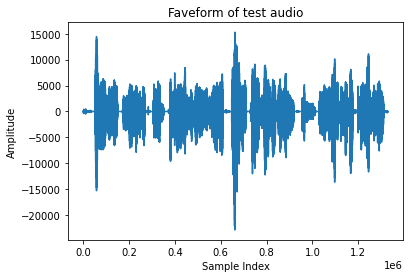

In [8]:
plt.figure()
plt.plot(data)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Faveform of test audio")
plt.show()

In [9]:
write("prueba.wav", Fs, data)

In [6]:
# Import necessary libraries
from pydub import AudioSegment
import speech_recognition as sr
  
# Input audio file to be sliced
audio = AudioSegment.from_wav("resultado.wav")
  
'''
Step #1 - Slicing the audio file into smaller chunks.
'''
# Length of the audiofile in milliseconds
n = len(audio)
  
# Variable to count the number of sliced chunks
counter = 1
  
# Text file to write the recognized audio
fh = open("recognized.txt", "w+")
  
# Interval length at which to slice the audio file.
# If length is 22 seconds, and interval is 5 seconds,
# The chunks created will be:
# chunk1 : 0 - 5 seconds
# chunk2 : 5 - 10 seconds
# chunk3 : 10 - 15 seconds
# chunk4 : 15 - 20 seconds
# chunk5 : 20 - 22 seconds
interval = 5 * 1000
  
# Length of audio to overlap. 
# If length is 22 seconds, and interval is 5 seconds,
# With overlap as 1.5 seconds,
# The chunks created will be:
# chunk1 : 0 - 5 seconds
# chunk2 : 3.5 - 8.5 seconds
# chunk3 : 7 - 12 seconds
# chunk4 : 10.5 - 15.5 seconds
# chunk5 : 14 - 19.5 seconds
# chunk6 : 18 - 22 seconds
overlap = 1.5 * 1000
  
# Initialize start and end seconds to 0
start = 0
end = 0
  
# Flag to keep track of end of file.
# When audio reaches its end, flag is set to 1 and we break
flag = 0
  
# Iterate from 0 to end of the file,
# with increment = interval
for i in range(0, 2 * n, interval):
      
    # During first iteration,
    # start is 0, end is the interval
    if i == 0:
        start = 0
        end = interval
  
    # All other iterations,
    # start is the previous end - overlap
    # end becomes end + interval
    else:
        start = end - overlap
        end = start + interval 
  
    # When end becomes greater than the file length,
    # end is set to the file length
    # flag is set to 1 to indicate break.
    if end >= n:
        end = n
        flag = 1
  
    # Storing audio file from the defined start to end
    chunk = audio[start:end]
  
    # Filename / Path to store the sliced audio
    filename = 'chunk'+str(counter)+'.wav'
  
    # Store the sliced audio file to the defined path
    chunk.export(filename, format ="wav")
    # Print information about the current chunk
    print("Processing chunk "+str(counter)+". Start = "
                        +str(start)+" end = "+str(end))
  
    # Increment counter for the next chunk
    counter = counter + 1
      
    # Slicing of the audio file is done.
    # Skip the below steps if there is some other usage
    # for the sliced audio files.
  
  
'''
Step #2 - Recognizing the chunk and writing to a file.
'''
  
    # Here, Google Speech Recognition is used
    # to take each chunk and recognize the text in it.
  
    # Specify the audio file to recognize
  
    AUDIO_FILE = "resultado.wav"
  
    # Initialize the recognizer
    r = sr.Recognizer()
  
    # Traverse the audio file and listen to the audio
    with sr.AudioFile(AUDIO_FILE) as source:
        audio_listened = r.listen(source)
  
    # Try to recognize the listened audio
    # And catch expections.
    try:    
        rec = r.recognize_google(audio_listened)
          
        # If recognized, write into the file.
        fh.write(rec+" ")
      
    # If google could not understand the audio
    except sr.UnknownValueError:
        print("Could not understand audio")
  
    # If the results cannot be requested from Google.
    # Probably an internet connection error.
    except sr.RequestError as e:
        print("Could not request results.")
  
    # Check for flag.
    # If flag is 1, end of the whole audio reached.
    # Close the file and break.
    if flag == 1:
        fh.close()
        break

IndentationError: unexpected indent (<ipython-input-6-6ab2fb98451e>, line 103)

In [20]:
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file("gopro.wav" , "wav") 
chunk_length_ms = 25000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

folder_name = "audio-chunks"
    # create a directory to store the audio chunks
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

#Export all of the individual chunks as wav files

for i, chunk in enumerate(chunks):
    chunk_name = os.path.join(folder_name, f"chunk{i}.wav")
    print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")

exporting audio-chunks\chunk0.wav
exporting audio-chunks\chunk1.wav
exporting audio-chunks\chunk2.wav
exporting audio-chunks\chunk3.wav
exporting audio-chunks\chunk4.wav
exporting audio-chunks\chunk5.wav
exporting audio-chunks\chunk6.wav
exporting audio-chunks\chunk7.wav
exporting audio-chunks\chunk8.wav
exporting audio-chunks\chunk9.wav
exporting audio-chunks\chunk10.wav
exporting audio-chunks\chunk11.wav
exporting audio-chunks\chunk12.wav
exporting audio-chunks\chunk13.wav
exporting audio-chunks\chunk14.wav
exporting audio-chunks\chunk15.wav
exporting audio-chunks\chunk16.wav
exporting audio-chunks\chunk17.wav
exporting audio-chunks\chunk18.wav
exporting audio-chunks\chunk19.wav
exporting audio-chunks\chunk20.wav
exporting audio-chunks\chunk21.wav
exporting audio-chunks\chunk22.wav
exporting audio-chunks\chunk23.wav
exporting audio-chunks\chunk24.wav
exporting audio-chunks\chunk25.wav
exporting audio-chunks\chunk26.wav
exporting audio-chunks\chunk27.wav
exporting audio-chunks\chunk28

In [5]:
  import speech_recognition as sr
  r = sr.Recognizer() 
  whole_text = ""
  data = []
  for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            try:
                text = r.recognize_google(audio_listened, language='es-ES')
            except sr.UnknownValueError as e:
                    print("Error:", str(e))
            else:
                text = f"{text} "
                data.insert(i-1, text)
                #print(chunk_filename, ":", text)
                whole_text += text
                print(data)
                

NameError: name 'chunks' is not defined

In [6]:
import moviepy.editor as mp
import speech_recognition as sr
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
import time
import nltk
import moviepy.editor as mp
from pydub.utils import make_chunks
       
myaudio = AudioSegment.from_file("gopro.wav" , "wav") 
chunk_length_ms = 25000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

folder_name = "audio-chunks"
            # create a directory to store the audio chunks
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

#Export all of the individual chunks as wav files

for i, chunk in enumerate(chunks):
    chunk_name = os.path.join(folder_name, f"chunk{i}.wav")
    #print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")
print("Chunks exportados correctamente...")
r = sr.Recognizer() 
lista_chunks = []
for i, audio_chunk in enumerate(chunks, start=1):
    # export audio chunk and save it in
    # the `folder_name` directory.
    chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
    audio_chunk.export(chunk_filename, format="wav")
    # recognize the chunk
    with sr.AudioFile(chunk_filename) as source:
        audio_listened = r.record(source)
        try:
            text = r.recognize_google(audio_listened, language='es-ES')
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
         text = f"{text} "
         lista_chunks.insert(i, text)
        ####################TOKENIZAR ############################
print("INSERTADO EN LA LISTA")
print(lista_chunks[0])
print(lista_chunks[1])
#data = []
#print(type(lista_chunks)) ES UNA LISTA
#longitud = len(lista_chunks)
#x = 0
#while x < longitud:
#    chunk = nltk.word_tokenize(lista_chunks[x])
#    print(chunk)
#    x+1
#print(data) 




def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

Chunks exportados correctamente...


In [2]:
import moviepy.editor as mp
import speech_recognition as sr
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
import time
import nltk
import moviepy.editor as mp
from pydub.utils import make_chunks
import unicodedata
from unidecode import unidecode

myaudio = AudioSegment.from_file('gopro.wav' , "wav") 
chunk_length_ms = 25000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

folder_name = "audio-chunks"
        # create a directory to store the audio chunks
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

#Export all of the individual chunks as wav files

for i, chunk in enumerate(chunks):
    chunk_name = os.path.join(folder_name, f"chunk{i}.wav")
    #print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")
print("Chunks exportados correctamente...")
r = sr.Recognizer() 
whole_text = ""
lista_chunks = []
file1 = open("chunks.txt","a")
for i, audio_chunk in enumerate(chunks, start=0): #Antes era 1 
    # export audio chunk and save it in
    # the `folder_name` directory.
    chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
    audio_chunk.export(chunk_filename, format="wav")
    # recognize the chunk
    with sr.AudioFile(chunk_filename) as source:
        audio_listened = r.record(source)
        try:
            text = r.recognize_google(audio_listened, language='es-ES')
            print('chunk', i)
            text = unidecode(text)
            lista_chunks.insert(i, text)
            file1.truncate(0)
            file1.write(text)
            file1.write("\n")
            print(lista_chunks[i])
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
            text = f"{text} "
            #print(chunk_filename, ":", text)
            whole_text += text
            
####################TOKENIZAR############################
print("Fichero escrito")
z = 0
data = [0]
while z < len(lista_chunks):
    lista_chunks.insert(z,  nltk.word_tokenize(lista_chunks[z])) 
    z = z+1
print(len(lista_chunks[0])) #24 PALABRAS
print(len(lista_chunks)) #30 STRINGS



longitud = len(data[0]) #Longitus es de 78 
longitud_interior = len(data[0][0])
i = 0 
x = 0  
basura = []
#print(type(basura))
#print(len(basura))
#rint(basura)
#basura = data[i]
#basura.insert(2, "hola")
#print(basura)
while i < len(data):
    basura = data[i]
    #print(type(basura))
    #print(len(basura))
    #print(i)
    while x < range(basura):
        #basura = data[i]
        ##CODIGOS DE ACCIONES DE MANOS Y PIES
        if basura[x] == 'giro' and basura[x + 1] == 'derecha':
            basura.insert(x+2, '[SW-TL-R]')
        elif basura[x] == 'giro' and basura[x + 1] == 'izquierda':
            basura.insert(x+2, '[SW-TL-L]')
        elif basura[x] == 'subo' and basura[x + 1] == 'marcha':
            basura.insert(x+2, '[GU]')
        elif basura[x] == 'bajo' and basura[x + 1] == 'marcha':
            basura.insert(x+2, '[GD]')
        elif basura[x] == 'bajo' and basura[x + 1] == 'de' and basura[x + 2] == 'marcha':
            basura.insert(x+2, '[GD]')
        elif basura[x] == 'intermitente' and basura[x + 1] == 'izquierda':
            basura.insert(x+2, '[LB-ON]')
        elif basura[x] == 'intermitente' and basura[x + 1] == 'derecha':
            basura.insert(x+2, '[RB-ON]')
        elif basura[x] == 'piso' and basura[x + 1] == 'embrague':
            basura.insert(x+2, '[G-ON]')
        elif basura[x] == 'suelto' and basura[x + 1] == 'embrague':
            basura.insert(x+2, '[G-OFF]')
        elif basura[x] == 'piso' and basura[x + 1] == 'acelerador':
            basura.insert(x+2, '[T-ON]')
        elif basura[x] == 'suelto' and basura[x + 1] == 'acelerador':
            basura.insert(x+2, '[T-OFF]')
        elif basura[x] == 'piso' and basura[x + 1] == 'freno':
            basura.insert(x+2, '[B-ON]')
        elif basura[x] == 'piso' and basura[x + 1] == 'frenos':
            basura.insert(x+2, '[B-ON]')
        elif basura[x] == 'suelto' and basura[x + 1] == 'freno':
            basura.insert(x+2, '[B-OFF]')
            print("PASO PRIMER TROZO")
        ##CODIGOS DE ESTIMULOS
        elif basura[x] == 'miro' and basura[x + 1] == 'frente':
            basura.insert(x+2, '[FV]')
        elif basura[x] == 'mira' and basura[x + 1] == 'enfrente':
            basura.insert(x+2, '[FV]')
        elif basura[x] == 'miro' and basura[x + 1] == 'retrovisor' and basura[x + 2] == 'central':
            basura.insert(x+3, '[FV-MIRROR]')
        elif basura[x] == 'mira' and basura[x + 1] == 'retrovisor' and basura[x + 2] == 'central':
            basura.insert(x+3, '[FV-MIRROR]')
        elif basura[x] == 'miro' and basura[x + 1] == 'central':
            basura.insert(x+2, '[FV-MIRROR]')
        elif basura[x] == 'miro' and basura[x + 1] == 'izquierda':
            basura.insert(x+2, '[LV]')
        elif basura[x] == 'retrovisor' and basura[x + 1] == 'izquierda':
            basura.insert(x+2, '[LV-MIRROR]')
        elif basura[x] == 'miro' and basura[x + 1] == 'retrovisor' and basura[x + 2] == 'izquierda':
            basura.insert(x+3, '[LV-MIRROR]')
        elif basura[x] == 'miro' and basura[x + 1] == 'frente' and basura[x + 2] == 'izquierda':
            basura.insert(x+3, '[FLV]')
        elif basura[x] == 'miro' and basura[x + 1] == 'derecha':
            basura.insert(x+2, '[RV]')
        elif basura[x] == 'miro' and basura[x + 1] == 'retrovisor' and basura[x + 2] == 'derecha':
            basura.insert(x+3, '[RV-MIRROR]')
        elif basura[x] == 'miro' and basura[x + 1] == 'frente' and basura[x + 2] == 'derecha':
            basura.insert(x+3, '[FRV]')
        elif basura[x] == 'miro' and basura[x + 1] == 'detras':
            basura.insert(x+2, '[BV]')
        x = x+1
    #print(basura)   
    data[i] = basura
    i = i+1
print(data[1])
print("\n")
print(data[2])
print("\n")
print(data[3])

Chunks exportados correctamente...
chunk 0
embrague bajo marcha suelto acelerador nissan terrano suelto embrague o marcha y sembrando marcha y ladies 36 quierda de Meteti pierda y de izquierda
chunk 1
mira retrovisor central piso embrague piso frenos bajo marcha una de freno y embrague bajo de marcha izquierda
chunk 2
salto embrague piso embrague Santa Fe de bautizo de segunda y pierda embrague
chunk 3
pisos en ador piso embrague suelto si puedo subo marcha generador y se freno que se utiliza
chunk 4
piso acelerador virtudes izquierda Pisuerga resumo marcha mira retrovisor central y sembrar reservo March
chunk 5
piso embrague bajo marcha 1911 entrar piso freno piso embrague bajo en marcha sucursales sombra me bajo marcha paro y despierta mirare
chunk 6
izquierda piso acelerador embrague y sembrado y subo marcha subtotales izquierda minuto izquierda acelero y Kevin en dicha la m***** dicho embrague bajo marcha para el coche miro derecha me lo noto visor derecho acelera suelto embrague y

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
for i in range(len(data)):
    for x in range(len(data[i])):
        basura = data[i]
        ##CODIGOS DE ACCIONES DE MANOS Y PIES
        if data[i][x] == 'giro' and data[i][x + 1] == 'derecha':
            data[i].insert(x+2, '[SW-TL-R]')
        elif data[i][x] == 'giro' and data[i][x + 1] == 'izquierda':
            data[i].insert(x+2, '[SW-TL-L]')
        elif data[i][x] == 'subo' and data[i][x + 1] == 'marcha':
            data[i].insert(x+2, '[GU]')
        elif data[i][x] == 'bajo' and data[i][x + 1] == 'marcha':
            data[i].insert(x+2, '[GD]')
        elif data[i][x] == 'bajo' and data[i][x + 1] == 'de' and data[i][x + 2] == 'marcha':
            data[i].insert(x+2, '[GD]')
        elif data[i][x] == 'intermitente' and data[i][x + 1] == 'izquierda':
            data[i].insert(x+2, '[LB-ON]')
        elif data[i][x] == 'intermitente' and data[i][x + 1] == 'derecha':
            data[i].insert(x+2, '[RB-ON]')
        elif data[i][x] == 'piso' and data[i][x + 1] == 'embrague':
            data[i].insert(x+2, '[G-ON]')
        elif data[i][x] == 'suelto' and data[i][x + 1] == 'embrague':
            data[i].insert(x+2, '[G-OFF]')
        elif data[i][x] == 'piso' and data[i][x + 1] == 'acelerador':
            data[i].insert(x+2, '[T-ON]')
        elif data[i][x] == 'suelto' and data[i][x + 1] == 'acelerador':
            data[i].insert(x+2, '[T-OFF]')
        elif data[i][x] == 'piso' and data[i][x + 1] == 'freno':
            data[i].insert(x+2, '[B-ON]')
        elif data[i][x] == 'piso' and data[i][x + 1] == 'frenos':
            data[i].insert(x+2, '[B-ON]')
        elif data[i][x] == 'suelto' and data[i][x + 1] == 'freno':
            data[i].insert(x+2, '[B-OFF]')
        ##CODIGOS DE ESTIMULOS
        elif data[i][x] == 'miro' and data[i][x + 1] == 'frente':
            data[i].insert(x+2, '[FV]')
        elif data[i][x] == 'mira' and data[i][x + 1] == 'enfrente':
            data[i].insert(x+2, '[FV]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'retrovisor' and data[i][x + 2] == 'central':
            data[i].insert(x+3, '[FV-MIRROR]')
        elif data[i][x] == 'mira' and data[i][x + 1] == 'retrovisor' and data[i][x + 2] == 'central':
            data[i].insert(x+3, '[FV-MIRROR]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'central':
            data[i].insert(x+2, '[FV-MIRROR]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'izquierda':
            data[i].insert(x+2, '[LV]')
        elif data[i][x] == 'retrovisor' and data[i][x + 1] == 'izquierda':
            data[i].insert(x+2, '[LV-MIRROR]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'retrovisor' and data[i][x + 2] == 'izquierda':
            data[i].insert(x+3, '[LV-MIRROR]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'frente' and data[i][x + 2] == 'izquierda':
            data[i].insert(x+3, '[FLV]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'derecha':
            data[i].insert(x+2, '[RV]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'retrovisor' and data[i][x + 2] == 'derecha':
            data[i].insert(x+3, '[RV-MIRROR]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'frente' and data[i][x + 2] == 'derecha':
            data[i].insert(x+3, '[FRV]')
        elif data[i][x] == 'miro' and data[i][x + 1] == 'detras':
            data[i].insert(x+2, '[BV]')
    data[i] = basura[i]
print(data)